## Grandma's bread shop

Try to clusterize the Grandma's bread shop customers by item and by date. Then try to explain how are the clusters (cluster EDA).

In [1]:
# Run this code

import pylab as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

df=pd.read_csv('data/breadbasket_dms.csv')

df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [2]:
# Your code here
df['Datetime']=pd.to_datetime(df.Date+' '+df.Time,
                                      format='%Y-%m-%d %H:%M:%S')

df.head()

,Date,Time,Transaction,Item,Datetime
0,2016-10-30,09:58:11,1,Bread,2016-10-30 09:58:11
1,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
2,2016-10-30,10:05:34,2,Scandinavian,2016-10-30 10:05:34
3,2016-10-30,10:07:57,3,Hot chocolate,2016-10-30 10:07:57
4,2016-10-30,10:07:57,3,Jam,2016-10-30 10:07:57


In [3]:
df.drop(['Date','Time'], axis=1, inplace = True)

In [4]:
dummies_item = pd.get_dummies(data=df, columns=['Item'])
dummies_item.head()

,Transaction,Datetime,Item_Adjustment,Item_Afternoon with the baker,Item_Alfajores,Item_Argentina Night,Item_Art Tray,Item_Bacon,Item_Baguette,Item_Bakewell,Item_Bare Popcorn,Item_Basket,Item_Bowl Nic Pitt,Item_Bread,Item_Bread Pudding,Item_Brioche and salami,Item_Brownie,Item_Cake,Item_Caramel bites,Item_Cherry me Dried fruit,Item_Chicken Stew,Item_Chicken sand,Item_Chimichurri Oil,Item_Chocolates,Item_Christmas common,Item_Coffee,Item_Coffee granules,Item_Coke,Item_Cookies,Item_Crepes,Item_Crisps,Item_Drinking chocolate spoons,Item_Duck egg,Item_Dulce de Leche,Item_Eggs,Item_Ella's Kitchen Pouches,Item_Empanadas,Item_Extra Salami or Feta,Item_Fairy Doors,Item_Farm House,Item_Focaccia,Item_Frittata,Item_Fudge,Item_Gift voucher,Item_Gingerbread syrup,Item_Granola,Item_Hack the stack,Item_Half slice Monster,Item_Hearty & Seasonal,Item_Honey,Item_Hot chocolate,Item_Jam,Item_Jammie Dodgers,Item_Juice,Item_Keeping It Local,Item_Kids biscuit,Item_Lemon and coconut,Item_Medialuna,Item_Mighty Protein,Item_Mineral water,Item_Mortimer,Item_Muesli,Item_Muffin,Item_My-5 Fruit Shoot,Item_NONE,Item_Nomad bag,Item_Olum & polenta,Item_Panatone,Item_Pastry,Item_Pick and Mix Bowls,Item_Pintxos,Item_Polenta,Item_Postcard,Item_Raspberry shortbread sandwich,Item_Raw bars,Item_Salad,Item_Sandwich,Item_Scandinavian,Item_Scone,Item_Siblings,Item_Smoothies,Item_Soup,Item_Spanish Brunch,Item_Spread,Item_Tacos/Fajita,Item_Tartine,Item_Tea,Item_The BART,Item_The Nomad,Item_Tiffin,Item_Toast,Item_Truffles,Item_Tshirt,Item_Valentine's card,Item_Vegan Feast,Item_Vegan mincepie,Item_Victorian Sponge
0,1,2016-10-30 09:58:11,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2016-10-30 10:05:34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2016-10-30 10:05:34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2016-10-30 10:07:57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,2016-10-30 10:07:57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
bread_group=dummies_item.groupby(['Datetime','Transaction']).sum()

bread_group.head()

,,Item_Adjustment,Item_Afternoon with the baker,Item_Alfajores,Item_Argentina Night,Item_Art Tray,Item_Bacon,Item_Baguette,Item_Bakewell,Item_Bare Popcorn,Item_Basket,Item_Bowl Nic Pitt,Item_Bread,Item_Bread Pudding,Item_Brioche and salami,Item_Brownie,Item_Cake,Item_Caramel bites,Item_Cherry me Dried fruit,Item_Chicken Stew,Item_Chicken sand,Item_Chimichurri Oil,Item_Chocolates,Item_Christmas common,Item_Coffee,Item_Coffee granules,Item_Coke,Item_Cookies,Item_Crepes,Item_Crisps,Item_Drinking chocolate spoons,Item_Duck egg,Item_Dulce de Leche,Item_Eggs,Item_Ella's Kitchen Pouches,Item_Empanadas,Item_Extra Salami or Feta,Item_Fairy Doors,Item_Farm House,Item_Focaccia,Item_Frittata,Item_Fudge,Item_Gift voucher,Item_Gingerbread syrup,Item_Granola,Item_Hack the stack,Item_Half slice Monster,Item_Hearty & Seasonal,Item_Honey,Item_Hot chocolate,Item_Jam,Item_Jammie Dodgers,Item_Juice,Item_Keeping It Local,Item_Kids biscuit,Item_Lemon and coconut,Item_Medialuna,Item_Mighty Protein,Item_Mineral water,Item_Mortimer,Item_Muesli,Item_Muffin,Item_My-5 Fruit Shoot,Item_NONE,Item_Nomad bag,Item_Olum & polenta,Item_Panatone,Item_Pastry,Item_Pick and Mix Bowls,Item_Pintxos,Item_Polenta,Item_Postcard,Item_Raspberry shortbread sandwich,Item_Raw bars,Item_Salad,Item_Sandwich,Item_Scandinavian,Item_Scone,Item_Siblings,Item_Smoothies,Item_Soup,Item_Spanish Brunch,Item_Spread,Item_Tacos/Fajita,Item_Tartine,Item_Tea,Item_The BART,Item_The Nomad,Item_Tiffin,Item_Toast,Item_Truffles,Item_Tshirt,Item_Valentine's card,Item_Vegan Feast,Item_Vegan mincepie,Item_Victorian Sponge
Datetime,Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-10-30 09:58:11,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-10-30 10:05:34,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-10-30 10:07:57,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-10-30 10:08:41,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-10-30 10:13:03,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
bread_group.reset_index(level='Datetime', inplace=True)

bread_group.head()

,Datetime,Item_Adjustment,Item_Afternoon with the baker,Item_Alfajores,Item_Argentina Night,Item_Art Tray,Item_Bacon,Item_Baguette,Item_Bakewell,Item_Bare Popcorn,Item_Basket,Item_Bowl Nic Pitt,Item_Bread,Item_Bread Pudding,Item_Brioche and salami,Item_Brownie,Item_Cake,Item_Caramel bites,Item_Cherry me Dried fruit,Item_Chicken Stew,Item_Chicken sand,Item_Chimichurri Oil,Item_Chocolates,Item_Christmas common,Item_Coffee,Item_Coffee granules,Item_Coke,Item_Cookies,Item_Crepes,Item_Crisps,Item_Drinking chocolate spoons,Item_Duck egg,Item_Dulce de Leche,Item_Eggs,Item_Ella's Kitchen Pouches,Item_Empanadas,Item_Extra Salami or Feta,Item_Fairy Doors,Item_Farm House,Item_Focaccia,Item_Frittata,Item_Fudge,Item_Gift voucher,Item_Gingerbread syrup,Item_Granola,Item_Hack the stack,Item_Half slice Monster,Item_Hearty & Seasonal,Item_Honey,Item_Hot chocolate,Item_Jam,Item_Jammie Dodgers,Item_Juice,Item_Keeping It Local,Item_Kids biscuit,Item_Lemon and coconut,Item_Medialuna,Item_Mighty Protein,Item_Mineral water,Item_Mortimer,Item_Muesli,Item_Muffin,Item_My-5 Fruit Shoot,Item_NONE,Item_Nomad bag,Item_Olum & polenta,Item_Panatone,Item_Pastry,Item_Pick and Mix Bowls,Item_Pintxos,Item_Polenta,Item_Postcard,Item_Raspberry shortbread sandwich,Item_Raw bars,Item_Salad,Item_Sandwich,Item_Scandinavian,Item_Scone,Item_Siblings,Item_Smoothies,Item_Soup,Item_Spanish Brunch,Item_Spread,Item_Tacos/Fajita,Item_Tartine,Item_Tea,Item_The BART,Item_The Nomad,Item_Tiffin,Item_Toast,Item_Truffles,Item_Tshirt,Item_Valentine's card,Item_Vegan Feast,Item_Vegan mincepie,Item_Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2016-10-30 10:05:34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2016-10-30 10:07:57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2016-10-30 10:08:41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2016-10-30 10:13:03,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
bread_group['day']=bread_group.Datetime.dt.day_name()
bread_group['hour']=bread_group.Datetime.dt.hour
bread_group['month']=bread_group.Datetime.dt.month

bread_group.head()

,Datetime,Item_Adjustment,Item_Afternoon with the baker,Item_Alfajores,Item_Argentina Night,Item_Art Tray,Item_Bacon,Item_Baguette,Item_Bakewell,Item_Bare Popcorn,Item_Basket,Item_Bowl Nic Pitt,Item_Bread,Item_Bread Pudding,Item_Brioche and salami,Item_Brownie,Item_Cake,Item_Caramel bites,Item_Cherry me Dried fruit,Item_Chicken Stew,Item_Chicken sand,Item_Chimichurri Oil,Item_Chocolates,Item_Christmas common,Item_Coffee,Item_Coffee granules,Item_Coke,Item_Cookies,Item_Crepes,Item_Crisps,Item_Drinking chocolate spoons,Item_Duck egg,Item_Dulce de Leche,Item_Eggs,Item_Ella's Kitchen Pouches,Item_Empanadas,Item_Extra Salami or Feta,Item_Fairy Doors,Item_Farm House,Item_Focaccia,Item_Frittata,Item_Fudge,Item_Gift voucher,Item_Gingerbread syrup,Item_Granola,Item_Hack the stack,Item_Half slice Monster,Item_Hearty & Seasonal,Item_Honey,Item_Hot chocolate,Item_Jam,Item_Jammie Dodgers,Item_Juice,Item_Keeping It Local,Item_Kids biscuit,Item_Lemon and coconut,Item_Medialuna,Item_Mighty Protein,Item_Mineral water,Item_Mortimer,Item_Muesli,Item_Muffin,Item_My-5 Fruit Shoot,Item_NONE,Item_Nomad bag,Item_Olum & polenta,Item_Panatone,Item_Pastry,Item_Pick and Mix Bowls,Item_Pintxos,Item_Polenta,Item_Postcard,Item_Raspberry shortbread sandwich,Item_Raw bars,Item_Salad,Item_Sandwich,Item_Scandinavian,Item_Scone,Item_Siblings,Item_Smoothies,Item_Soup,Item_Spanish Brunch,Item_Spread,Item_Tacos/Fajita,Item_Tartine,Item_Tea,Item_The BART,Item_The Nomad,Item_Tiffin,Item_Toast,Item_Truffles,Item_Tshirt,Item_Valentine's card,Item_Vegan Feast,Item_Vegan mincepie,Item_Victorian Sponge,day,hour,month
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sunday,9,10
2,2016-10-30 10:05:34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sunday,10,10
3,2016-10-30 10:07:57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sunday,10,10
4,2016-10-30 10:08:41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sunday,10,10
5,2016-10-30 10:13:03,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sunday,10,10


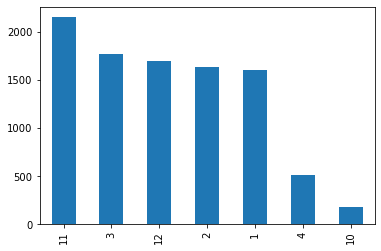

In [8]:
bread_group.month.value_counts().plot(kind='bar');

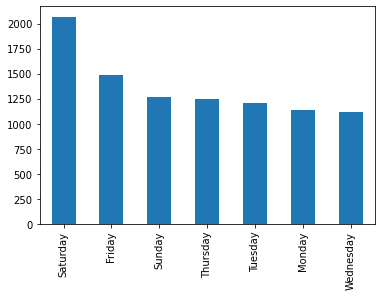

In [9]:
bread_group.day.value_counts().plot(kind='bar');

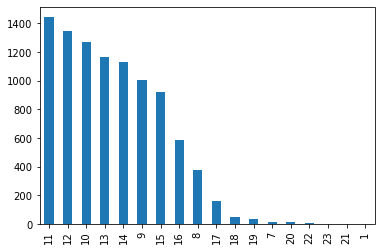

In [10]:
bread_group.hour.value_counts().plot(kind='bar');

In [11]:
bread_dummy=pd.get_dummies(data=bread_group, columns=['day']).drop('Datetime', axis=1)
bread_dummy.head()

,Item_Adjustment,Item_Afternoon with the baker,Item_Alfajores,Item_Argentina Night,Item_Art Tray,Item_Bacon,Item_Baguette,Item_Bakewell,Item_Bare Popcorn,Item_Basket,Item_Bowl Nic Pitt,Item_Bread,Item_Bread Pudding,Item_Brioche and salami,Item_Brownie,Item_Cake,Item_Caramel bites,Item_Cherry me Dried fruit,Item_Chicken Stew,Item_Chicken sand,Item_Chimichurri Oil,Item_Chocolates,Item_Christmas common,Item_Coffee,Item_Coffee granules,Item_Coke,Item_Cookies,Item_Crepes,Item_Crisps,Item_Drinking chocolate spoons,Item_Duck egg,Item_Dulce de Leche,Item_Eggs,Item_Ella's Kitchen Pouches,Item_Empanadas,Item_Extra Salami or Feta,Item_Fairy Doors,Item_Farm House,Item_Focaccia,Item_Frittata,Item_Fudge,Item_Gift voucher,Item_Gingerbread syrup,Item_Granola,Item_Hack the stack,Item_Half slice Monster,Item_Hearty & Seasonal,Item_Honey,Item_Hot chocolate,Item_Jam,Item_Jammie Dodgers,Item_Juice,Item_Keeping It Local,Item_Kids biscuit,Item_Lemon and coconut,Item_Medialuna,Item_Mighty Protein,Item_Mineral water,Item_Mortimer,Item_Muesli,Item_Muffin,Item_My-5 Fruit Shoot,Item_NONE,Item_Nomad bag,Item_Olum & polenta,Item_Panatone,Item_Pastry,Item_Pick and Mix Bowls,Item_Pintxos,Item_Polenta,Item_Postcard,Item_Raspberry shortbread sandwich,Item_Raw bars,Item_Salad,Item_Sandwich,Item_Scandinavian,Item_Scone,Item_Siblings,Item_Smoothies,Item_Soup,Item_Spanish Brunch,Item_Spread,Item_Tacos/Fajita,Item_Tartine,Item_Tea,Item_The BART,Item_The Nomad,Item_Tiffin,Item_Toast,Item_Truffles,Item_Tshirt,Item_Valentine's card,Item_Vegan Feast,Item_Vegan mincepie,Item_Victorian Sponge,hour,month,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,10,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,10,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,10,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,10,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,10,0,0,0,1,0,0,0


In [12]:
from sklearn.decomposition import PCA

In [13]:
pca=PCA(n_components=4).fit_transform(bread_dummy)

pca_df=pd.DataFrame(pca, columns=[f'pc_{i+1}' for i in range(4)])

pca_df.head()

,pc_1,pc_2,pc_3,pc_4
0,3.996122,3.060308,-0.765432,0.407538
1,3.973800,2.043395,-0.423493,-0.506241
2,3.970516,2.033851,-0.364293,-0.490864
3,3.972541,2.041104,-0.377553,-0.474748
4,3.966862,2.100908,0.191442,0.803372


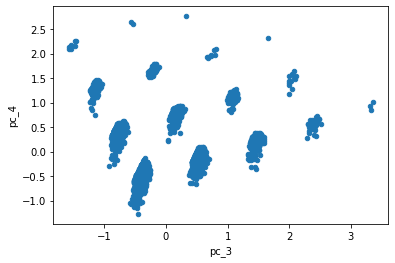

In [103]:
pca_df.plot.scatter(x='pc_3', y='pc_4');

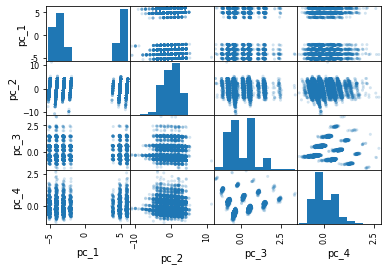

In [104]:
pd.plotting.scatter_matrix(pca_df, alpha=0.2);

In [15]:
from sklearn.manifold import TSNE

In [16]:
tsne=TSNE(n_components=2, perplexity=15)

emb=tsne.fit_transform(bread_dummy)

emb_df=pd.DataFrame(emb, columns=['emb_1', 'emb_2'])

emb_df.head()

,emb_1,emb_2
0,78.142082,-4.319343
1,82.643791,-0.899142
2,80.858513,-2.982500
3,80.324089,-2.085617
4,75.870796,-2.627465


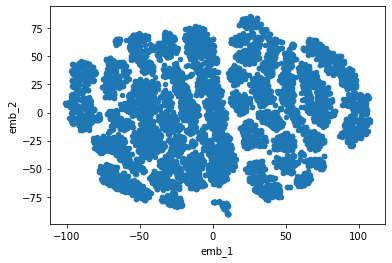

In [17]:
emb_df.plot.scatter(x='emb_1', y='emb_2');

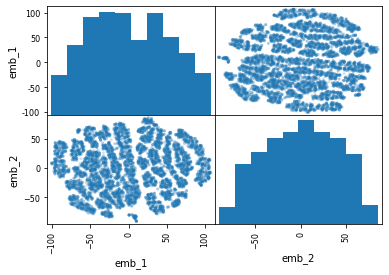

In [105]:
pd.plotting.scatter_matrix(emb_df, alpha=0.2);

In [19]:
import warnings
warnings.simplefilter('ignore')

from umap import UMAP

In [20]:
umap=UMAP(n_components=2)

emb=umap.fit_transform(bread_dummy)

umap_df=pd.DataFrame(emb, columns=['emb_1', 'emb_2'])

umap_df.head()

,emb_1,emb_2
0,16.100315,-0.091403
1,16.566725,0.145962
2,16.366356,0.018263
3,16.425312,0.064799
4,16.089439,0.073373


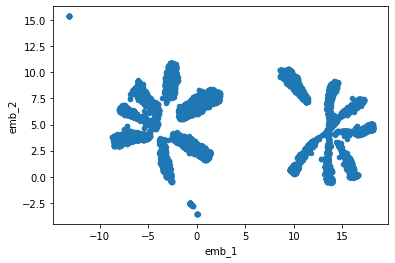

In [21]:
umap_df.plot.scatter(x='emb_1', y='emb_2');

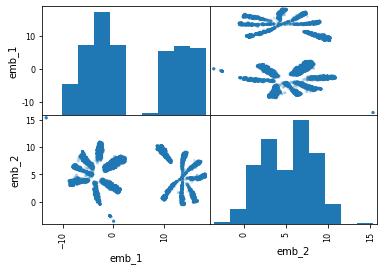

In [106]:
pd.plotting.scatter_matrix(umap_df, alpha=0.2);

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans=KMeans(n_clusters=4).fit(pca_df)

In [24]:
bread_group['label']=kmeans.predict(pca_df)

bread_group.head()

,Datetime,Item_Adjustment,Item_Afternoon with the baker,Item_Alfajores,Item_Argentina Night,Item_Art Tray,Item_Bacon,Item_Baguette,Item_Bakewell,Item_Bare Popcorn,Item_Basket,Item_Bowl Nic Pitt,Item_Bread,Item_Bread Pudding,Item_Brioche and salami,Item_Brownie,Item_Cake,Item_Caramel bites,Item_Cherry me Dried fruit,Item_Chicken Stew,Item_Chicken sand,Item_Chimichurri Oil,Item_Chocolates,Item_Christmas common,Item_Coffee,Item_Coffee granules,Item_Coke,Item_Cookies,Item_Crepes,Item_Crisps,Item_Drinking chocolate spoons,Item_Duck egg,Item_Dulce de Leche,Item_Eggs,Item_Ella's Kitchen Pouches,Item_Empanadas,Item_Extra Salami or Feta,Item_Fairy Doors,Item_Farm House,Item_Focaccia,Item_Frittata,Item_Fudge,Item_Gift voucher,Item_Gingerbread syrup,Item_Granola,Item_Hack the stack,Item_Half slice Monster,Item_Hearty & Seasonal,Item_Honey,Item_Hot chocolate,Item_Jam,Item_Jammie Dodgers,Item_Juice,Item_Keeping It Local,Item_Kids biscuit,Item_Lemon and coconut,Item_Medialuna,Item_Mighty Protein,Item_Mineral water,Item_Mortimer,Item_Muesli,Item_Muffin,Item_My-5 Fruit Shoot,Item_NONE,Item_Nomad bag,Item_Olum & polenta,Item_Panatone,Item_Pastry,Item_Pick and Mix Bowls,Item_Pintxos,Item_Polenta,Item_Postcard,Item_Raspberry shortbread sandwich,Item_Raw bars,Item_Salad,Item_Sandwich,Item_Scandinavian,Item_Scone,Item_Siblings,Item_Smoothies,Item_Soup,Item_Spanish Brunch,Item_Spread,Item_Tacos/Fajita,Item_Tartine,Item_Tea,Item_The BART,Item_The Nomad,Item_Tiffin,Item_Toast,Item_Truffles,Item_Tshirt,Item_Valentine's card,Item_Vegan Feast,Item_Vegan mincepie,Item_Victorian Sponge,day,hour,month,label
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2016-10-30 09:58:11,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sunday,9,10,1
2,2016-10-30 10:05:34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sunday,10,10,1
3,2016-10-30 10:07:57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sunday,10,10,1
4,2016-10-30 10:08:41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sunday,10,10,1
5,2016-10-30 10:13:03,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Sunday,10,10,1


In [25]:
bread_group.Item_Bakewell.value_counts()

0    9483
1      48
Name: Item_Bakewell, dtype: int64

In [26]:
bread_group.shape

(9531, 100)

In [27]:
bread_group.Item_Baguette.value_counts()

0    9379
1     152
Name: Item_Baguette, dtype: int64

In [28]:
bread_group.hour.value_counts().nlargest(10)

11    1445
12    1347
10    1267
13    1163
14    1130
9     1007
15     924
16     583
8      375
17     160
Name: hour, dtype: int64

In [29]:
cm=sns.light_palette('green', as_cmap=True)

pd.crosstab(bread_group.hour, bread_group.label).style.background_gradient(cmap=cm)

label,0,1,2,3
hour,,,,
1,1,0,0,0
7,5,11,0,0
8,211,164,0,0
9,569,438,0,0
10,689,578,0,0
11,810,635,0,0
12,803,544,0,0
13,0,0,501,662
14,0,0,459,671


In [30]:
pd.crosstab(bread_group.day, bread_group.label).style.background_gradient(cmap=cm)

label,0,1,2,3
day,,,,
Friday,475,387,262,364
Monday,360,290,212,273
Saturday,731,463,327,547
Sunday,425,322,194,323
Thursday,396,308,257,291
Tuesday,379,293,201,330
Wednesday,322,307,202,290


In [31]:
pd.crosstab(bread_group.month, bread_group.label).style.background_gradient(cmap=cm)

label,0,1,2,3
month,,,,
1,922,0,0,676
2,870,0,0,760
3,1019,0,0,749
4,277,0,0,233
10,0,120,55,0
11,0,1277,877,0
12,0,973,723,0


In [32]:
pd.crosstab(bread_group.Item_Baguette, bread_group.label).style.background_gradient(cmap=cm)

label,0,1,2,3
Item_Baguette,,,,
0,2981,2370,1655,2373
1,107,0,0,45


In [33]:
pd.crosstab(bread_group.Item_Alfajores, bread_group.label).style.background_gradient(cmap=cm)

label,0,1,2,3
Item_Alfajores,,,,
0,3010,2314,1540,2323
1,72,53,103,91
2,6,3,12,4


In [34]:
bread_group[(bread_group.day=='Saturday')&(bread_group.label==0)]

,Datetime,Item_Adjustment,Item_Afternoon with the baker,Item_Alfajores,Item_Argentina Night,Item_Art Tray,Item_Bacon,Item_Baguette,Item_Bakewell,Item_Bare Popcorn,Item_Basket,Item_Bowl Nic Pitt,Item_Bread,Item_Bread Pudding,Item_Brioche and salami,Item_Brownie,Item_Cake,Item_Caramel bites,Item_Cherry me Dried fruit,Item_Chicken Stew,Item_Chicken sand,Item_Chimichurri Oil,Item_Chocolates,Item_Christmas common,Item_Coffee,Item_Coffee granules,Item_Coke,Item_Cookies,Item_Crepes,Item_Crisps,Item_Drinking chocolate spoons,Item_Duck egg,Item_Dulce de Leche,Item_Eggs,Item_Ella's Kitchen Pouches,Item_Empanadas,Item_Extra Salami or Feta,Item_Fairy Doors,Item_Farm House,Item_Focaccia,Item_Frittata,Item_Fudge,Item_Gift voucher,Item_Gingerbread syrup,Item_Granola,Item_Hack the stack,Item_Half slice Monster,Item_Hearty & Seasonal,Item_Honey,Item_Hot chocolate,Item_Jam,Item_Jammie Dodgers,Item_Juice,Item_Keeping It Local,Item_Kids biscuit,Item_Lemon and coconut,Item_Medialuna,Item_Mighty Protein,Item_Mineral water,Item_Mortimer,Item_Muesli,Item_Muffin,Item_My-5 Fruit Shoot,Item_NONE,Item_Nomad bag,Item_Olum & polenta,Item_Panatone,Item_Pastry,Item_Pick and Mix Bowls,Item_Pintxos,Item_Polenta,Item_Postcard,Item_Raspberry shortbread sandwich,Item_Raw bars,Item_Salad,Item_Sandwich,Item_Scandinavian,Item_Scone,Item_Siblings,Item_Smoothies,Item_Soup,Item_Spanish Brunch,Item_Spread,Item_Tacos/Fajita,Item_Tartine,Item_Tea,Item_The BART,Item_The Nomad,Item_Tiffin,Item_Toast,Item_Truffles,Item_Tshirt,Item_Valentine's card,Item_Vegan Feast,Item_Vegan mincepie,Item_Victorian Sponge,day,hour,month,label
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4271,2017-01-07 08:23:46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Saturday,8,1,0
4272,2017-01-07 08:44:16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Saturday,8,1,0
4273,2017-01-07 08:52:19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Saturday,8,1,0
4274,2017-01-07 09:02:37,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Saturday,9,1,0
4275,2017-01-07 09:04:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Saturday,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9595,2017-04-08 12:32:33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Saturday,12,4,0
9596,2017-04-08 12:36:05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Saturday,12,4,0
9597,2017-04-08 12:47:36,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Saturday,12,4,0


In [35]:
pd.crosstab(bread_group.Item_Alfajores, bread_group.label).style.background_gradient(cmap=cm)

label,0,1,2,3
Item_Alfajores,,,,
0,3010,2314,1540,2323
1,72,53,103,91
2,6,3,12,4


In [36]:
bread_group.columns

Index(['Datetime', 'Item_Adjustment', 'Item_Afternoon with the baker',
       'Item_Alfajores', 'Item_Argentina Night', 'Item_Art Tray', 'Item_Bacon',
       'Item_Baguette', 'Item_Bakewell', 'Item_Bare Popcorn', 'Item_Basket',
       'Item_Bowl Nic Pitt', 'Item_Bread', 'Item_Bread Pudding',
       'Item_Brioche and salami', 'Item_Brownie', 'Item_Cake',
       'Item_Caramel bites', 'Item_Cherry me Dried fruit', 'Item_Chicken Stew',
       'Item_Chicken sand', 'Item_Chimichurri Oil', 'Item_Chocolates',
       'Item_Christmas common', 'Item_Coffee', 'Item_Coffee granules ',
       'Item_Coke', 'Item_Cookies', 'Item_Crepes', 'Item_Crisps',
       'Item_Drinking chocolate spoons ', 'Item_Duck egg',
       'Item_Dulce de Leche', 'Item_Eggs', 'Item_Ella's Kitchen Pouches',
       'Item_Empanadas', 'Item_Extra Salami or Feta', 'Item_Fairy Doors',
       'Item_Farm House', 'Item_Focaccia', 'Item_Frittata', 'Item_Fudge',
       'Item_Gift voucher', 'Item_Gingerbread syrup', 'Item_Granola',
    

In [37]:
from sklearn.cluster import DBSCAN

In [38]:
dbscan=DBSCAN()

bread_group['label']=dbscan.fit_predict(umap_df)


bread_merge=df.merge(bread_group.reset_index()[['label', 'Transaction']],
                             on='Transaction', how='left')

bread_merge.head()

,Transaction,Item,Datetime,label
0,1,Bread,2016-10-30 09:58:11,0
1,2,Scandinavian,2016-10-30 10:05:34,0
2,2,Scandinavian,2016-10-30 10:05:34,0
3,3,Hot chocolate,2016-10-30 10:07:57,0
4,3,Jam,2016-10-30 10:07:57,0


In [39]:
pd.crosstab(bread_group.hour, bread_group.label).style.background_gradient(cmap=cm)

label,-1,0,1,2,3,4,5,6,7,8,9,10
hour,,,,,,,,,,,,
1,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,4,7,0,4,0,1,0,0,0,0
8,0,0,23,105,36,87,71,52,1,0,0,0
9,1,27,70,269,71,218,150,141,60,0,0,0
10,0,84,63,293,138,237,191,164,97,0,0,0
11,0,124,60,320,131,283,199,196,132,0,0,0
12,0,88,67,303,86,268,224,179,132,0,0,0
13,0,64,64,275,98,244,187,124,107,0,0,0
14,0,65,63,241,90,246,170,147,108,0,0,0


In [40]:
pd.crosstab(bread_group.day, bread_group.label).style.background_gradient(cmap=cm)

label,-1,0,1,2,3,4,5,6,7,8,9,10
day,,,,,,,,,,,,
Friday,0,1,0,648,0,3,835,0,0,1,0,0
Monday,0,1,494,7,0,3,629,0,1,0,0,0
Saturday,0,0,0,13,777,1,2,1223,0,44,0,8
Sunday,0,511,4,1,0,2,3,2,731,0,10,0
Thursday,0,0,0,565,0,684,1,1,1,0,0,0
Tuesday,1,0,0,493,0,706,0,0,1,0,0,2
Wednesday,0,0,0,509,0,607,0,1,3,0,0,1


In [41]:
bread_group[bread_group.label==3].describe()

,Item_Adjustment,Item_Afternoon with the baker,Item_Alfajores,Item_Argentina Night,Item_Art Tray,Item_Bacon,Item_Baguette,Item_Bakewell,Item_Bare Popcorn,Item_Basket,Item_Bowl Nic Pitt,Item_Bread,Item_Bread Pudding,Item_Brioche and salami,Item_Brownie,Item_Cake,Item_Caramel bites,Item_Cherry me Dried fruit,Item_Chicken Stew,Item_Chicken sand,Item_Chimichurri Oil,Item_Chocolates,Item_Christmas common,Item_Coffee,Item_Coffee granules,Item_Coke,Item_Cookies,Item_Crepes,Item_Crisps,Item_Drinking chocolate spoons,Item_Duck egg,Item_Dulce de Leche,Item_Eggs,Item_Ella's Kitchen Pouches,Item_Empanadas,Item_Extra Salami or Feta,Item_Fairy Doors,Item_Farm House,Item_Focaccia,Item_Frittata,Item_Fudge,Item_Gift voucher,Item_Gingerbread syrup,Item_Granola,Item_Hack the stack,Item_Half slice Monster,Item_Hearty & Seasonal,Item_Honey,Item_Hot chocolate,Item_Jam,Item_Jammie Dodgers,Item_Juice,Item_Keeping It Local,Item_Kids biscuit,Item_Lemon and coconut,Item_Medialuna,Item_Mighty Protein,Item_Mineral water,Item_Mortimer,Item_Muesli,Item_Muffin,Item_My-5 Fruit Shoot,Item_NONE,Item_Nomad bag,Item_Olum & polenta,Item_Panatone,Item_Pastry,Item_Pick and Mix Bowls,Item_Pintxos,Item_Polenta,Item_Postcard,Item_Raspberry shortbread sandwich,Item_Raw bars,Item_Salad,Item_Sandwich,Item_Scandinavian,Item_Scone,Item_Siblings,Item_Smoothies,Item_Soup,Item_Spanish Brunch,Item_Spread,Item_Tacos/Fajita,Item_Tartine,Item_Tea,Item_The BART,Item_The Nomad,Item_Tiffin,Item_Toast,Item_Truffles,Item_Tshirt,Item_Valentine's card,Item_Vegan Feast,Item_Vegan mincepie,Item_Victorian Sponge,hour,month,label
count,777.0,777.0,777.000000,777.0,777.000000,777.0,777.0,777.000000,777.0,777.000000,777.000000,777.000000,777.0,777.0,777.000000,777.000000,777.000000,777.0,777.0,777.0,777.0,777.0,777.0,777.000000,777.0,777.000000,777.000000,777.0,777.000000,777.0,777.0,777.000000,777.000000,777.000000,777.0,777.0,777.000000,777.000000,777.000000,777.000000,777.000000,777.0,777.000000,777.000000,777.0,777.0,777.000000,777.0,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.0,777.0,777.000000,777.000000,777.000000,777.0,777.0,777.000000,777.000000,777.000000,777.0,777.0,777.0,777.0,777.0,777.0,777.000000,777.000000,777.000000,777.0,777.000000,777.000000,777.0,777.0,777.0,777.000000,777.000000,777.0,777.000000,777.0,777.000000,777.000000,777.0,777.0,777.0,777.000000,777.000000,777.000000,777.000000,777.0
mean,0.0,0.0,0.034749,0.0,0.003861,0.0,0.0,0.003861,0.0,0.003861,0.001287,0.374517,0.0,0.0,0.056628,0.070785,0.003861,0.0,0.0,0.0,0.0,0.0,0.0,0.525097,0.0,0.014157,0.024453,0.0,0.002574,0.0,0.0,0.001287,0.001287,0.001287,0.0,0.0,0.001287,0.054054,0.023166,0.030888,0.030888,0.0,0.001287,0.002574,0.0,0.0,0.011583,0.0,0.079794,0.033462,0.011583,0.023166,0.009009,0.005148,0.001287,0.109395,0.003861,0.011583,0.0,0.0,0.061776,0.005148,0.109395,0.0,0.0,0.002574,0.074646,0.002574,0.0,0.0,0.0,0.0,0.0,0.0,0.057915,0.066924,0.051480,0.0,0.002574,0.015444,0.0,0.0,0.0,0.011583,0.140283,0.0,0.003861,0.0,0.009009,0.012870,0.0,0.0,0.0,0.012870,0.001287,11.943372,11.482625,3.0
std,0.0,0.0,0.183261,0.0,0.062057,0.0,0.0,0.062057,0.0,0.062057,0.035875,0.539682,0.0,0.0,0.231279,0.261604,0.062057,0.0,0.0,0.0,0.0,0.0,0.0,0.659741,0.0,0.118214,0.154550,0.0,0.050702,0.0,0.0,0.035875,0.035875,0.035875,0.0,0.0,0.035875,0.226270,0.150527,0.173126,0.173126,0.0,0.035875,0.050702,0.0,0.0,0.107068,0.0,0.289536,0.186979,0.107068,0.150527,0.094548,0.071611,0.035875,0.328424,0.062057,0.107068,0.0,0.0,0.246195,0.071611,0.332325,0.0,0.0,0.050702,0.262989,0.050702,0.0,0.0,0.0,0.0,0.0,0.0,0.259842,0.250051,0.221117,0.0,0.050702,0.123390,0.0,0.0,0.0,0.107068,0.362034,0.0,0.062057,0.0,0.094548,0.112786,0.0,0.0,0.0,0.112786,0.035875,2.250289,0.500020,0.0
min,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000

In [42]:
# Your explanation here
# clientes segun dia y artículo: grupo 7 va a la actividad afternoon with the baker exclusivamente, el 6 tambien acude pero consume diferentes productos, parece que para pasar el rato en la actividad
# el grupo  8 son las personas que compran artículos de san valentin, con algun otro artículo como agua, zumo...
# el grupo 0 parece que son clientes habituales, tanto de comida como de compra en la pastelería. enfocado a productos de alimentacion
#el grupo 1 compra productos para el fin de semana, tales como pan, chocolate caliente, algun que otro sandwitch, pasteleria variada.
#el grupo 2 es muy similar al grupo 0
#grupo 3 son clientes que adquieren productos variados y pocos asisten a la tarde bakery, compran productos como cafe, tarta, galletas, pan... poca cosa


In [43]:
!pip install hdbscan

In [44]:
from hdbscan import HDBSCAN

In [93]:
hdbscan=HDBSCAN(min_cluster_size=50)

bread_group['label']=hdbscan.fit_predict(umap_df)

In [94]:
pd.crosstab(bread_group.hour, bread_group.label).style.background_gradient(cmap=cm)

label,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
hour,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,4,0,1,1,1,0,2,2,1,3
8,0,36,0,23,48,52,1,23,0,26,35,36,0,26,17,28,24
9,3,71,0,53,97,141,60,70,27,77,76,99,0,63,55,51,64
10,0,138,0,91,100,164,97,63,84,81,75,90,0,81,65,63,75
11,5,131,0,87,112,196,132,60,124,93,110,87,0,75,75,87,71
12,11,86,0,105,119,179,132,67,88,93,98,74,0,67,79,78,71
13,6,98,0,75,112,124,107,64,64,106,76,81,45,12,60,60,73
14,5,90,0,72,98,147,108,63,65,75,86,68,81,0,53,50,69


In [95]:
pd.crosstab(bread_group.day, bread_group.label).style.background_gradient(cmap=cm)

label,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
day,,,,,,,,,,,,,,,,,
Friday,21,0,1,0,835,0,0,0,1,1,1,624,0,0,0,1,3
Monday,4,0,0,629,0,0,1,494,1,0,1,1,0,0,1,2,1
Saturday,9,777,44,0,2,1223,0,0,0,0,1,0,0,0,0,1,11
Sunday,11,0,10,1,2,2,731,4,503,0,0,0,0,0,0,0,0
Thursday,5,0,0,0,1,1,0,0,0,0,680,1,0,0,0,0,564
Tuesday,37,0,0,0,0,0,1,0,0,694,0,0,1,0,454,0,16
Wednesday,41,0,0,0,0,1,3,0,0,0,0,0,263,326,0,486,1


In [89]:
bread_group[bread_group.label==-1].describe()

,Item_Adjustment,Item_Afternoon with the baker,Item_Alfajores,Item_Argentina Night,Item_Art Tray,Item_Bacon,Item_Baguette,Item_Bakewell,Item_Bare Popcorn,Item_Basket,Item_Bowl Nic Pitt,Item_Bread,Item_Bread Pudding,Item_Brioche and salami,Item_Brownie,Item_Cake,Item_Caramel bites,Item_Cherry me Dried fruit,Item_Chicken Stew,Item_Chicken sand,Item_Chimichurri Oil,Item_Chocolates,Item_Christmas common,Item_Coffee,Item_Coffee granules,Item_Coke,Item_Cookies,Item_Crepes,Item_Crisps,Item_Drinking chocolate spoons,Item_Duck egg,Item_Dulce de Leche,Item_Eggs,Item_Ella's Kitchen Pouches,Item_Empanadas,Item_Extra Salami or Feta,Item_Fairy Doors,Item_Farm House,Item_Focaccia,Item_Frittata,Item_Fudge,Item_Gift voucher,Item_Gingerbread syrup,Item_Granola,Item_Hack the stack,Item_Half slice Monster,Item_Hearty & Seasonal,Item_Honey,Item_Hot chocolate,Item_Jam,Item_Jammie Dodgers,Item_Juice,Item_Keeping It Local,Item_Kids biscuit,Item_Lemon and coconut,Item_Medialuna,Item_Mighty Protein,Item_Mineral water,Item_Mortimer,Item_Muesli,Item_Muffin,Item_My-5 Fruit Shoot,Item_NONE,Item_Nomad bag,Item_Olum & polenta,Item_Panatone,Item_Pastry,Item_Pick and Mix Bowls,Item_Pintxos,Item_Polenta,Item_Postcard,Item_Raspberry shortbread sandwich,Item_Raw bars,Item_Salad,Item_Sandwich,Item_Scandinavian,Item_Scone,Item_Siblings,Item_Smoothies,Item_Soup,Item_Spanish Brunch,Item_Spread,Item_Tacos/Fajita,Item_Tartine,Item_Tea,Item_The BART,Item_The Nomad,Item_Tiffin,Item_Toast,Item_Truffles,Item_Tshirt,Item_Valentine's card,Item_Vegan Feast,Item_Vegan mincepie,Item_Victorian Sponge,hour,month,label
count,475.000000,475.0,475.000000,475.0,475.000000,475.0,475.0,475.000000,475.000000,475.0,475.0,475.000000,475.000000,475.0,475.000000,475.000000,475.0,475.0,475.0,475.0,475.0,475.0,475.0,475.000000,475.0,475.000000,475.000000,475.000000,475.000000,475.0,475.0,475.000000,475.000000,475.000000,475.000000,475.0,475.0,475.000000,475.000000,475.000000,475.000000,475.0,475.0,475.0,475.000000,475.0,475.000000,475.0,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.0,475.0,475.000000,475.000000,475.000000,475.0,475.0,475.0,475.000000,475.000000,475.000000,475.0,475.0,475.0,475.0,475.0,475.000000,475.000000,475.000000,475.0,475.0,475.000000,475.0,475.0,475.0,475.000000,475.000000,475.0,475.0,475.000000,475.000000,475.000000,475.0,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.0
mean,0.002105,0.0,0.122105,0.0,0.008421,0.0,0.0,0.006316,0.004211,0.0,0.0,0.250526,0.002105,0.0,0.063158,0.075789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.536842,0.0,0.027368,0.077895,0.002105,0.002105,0.0,0.0,0.008421,0.002105,0.010526,0.004211,0.0,0.0,0.031579,0.004211,0.002105,0.044211,0.0,0.0,0.0,0.002105,0.0,0.002105,0.0,0.122105,0.018947,0.010526,0.046316,0.004211,0.008421,0.002105,0.075789,0.006316,0.023158,0.0,0.0,0.037895,0.010526,0.050526,0.0,0.0,0.0,0.058947,0.002105,0.012632,0.0,0.0,0.0,0.0,0.0,0.040000,0.037895,0.004211,0.0,0.0,0.012632,0.0,0.0,0.0,0.012632,0.178947,0.0,0.0,0.012632,0.006316,0.021053,0.0,0.004211,0.014737,0.012632,0.004211,15.814737,11.151579,-1.0
std,0.045883,0.0,0.358495,0.0,0.091475,0.0,0.0,0.079304,0.064820,0.0,0.0,0.462034,0.045883,0.0,0.243503,0.272787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.678334,0.0,0.163327,0.290924,0.045883,0.045883,0.0,0.0,0.091475,0.045883,0.102164,0.064820,0.0,0.0,0.175061,0.064820,0.045883,0.234528,0.0,0.0,0.0,0.045883,0.0,0.045883,0.0,0.381309,0.176878,0.102164,0.210390,0.064820,0.091475,0.045883,0.280414,0.079304,0.150563,0.0,0.0,0.191143,0.102164,0.237726,0.0,0.0,0.0,0.244559,0.045883,0.111796,0.0,0.0,0.0,0.0,0.0,0.206641,0.191143,0.064820,0.0,0.0,0.111796,0.0,0.0,0.0,0.129297,0.394555,0.0,0.0,0.111796,0.079304,0.157710,0.0,0.064820,0.120625,0.111796,0.064820,2.100681,1.262145,0.0
min,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0